<h1>Taxi Trip Fare Data 2023</h1>
<p>A dataset of taxi trip details, including fare, distance, and payment type.</p>
<h2>About Dataset</h2>
<p>This dataset contains detailed information about taxi trips, including passenger count, trip distance, payment type, fare amount, and trip duration. It is useful for various data analysis and machine learning applications, such as fare prediction and ride pattern analysis.</p>
<h2>Data Source</h2>
<p><strong>Kaggle:</strong> <a href="https://www.kaggle.com/datasets/hrish4/taxi-trip-fare-data-2023">taxi-trip-fare-data-2023</a></p>
<h2>Pricing Policy</h2>
The fare calculation in this project adheres to the official pricing policy provided by the fictional taxi company stakeholder:
<table>
<tr>
<th>Component</th>
<th>Rate</th>
<th>Applied To</th>
</tr>
<tr>
<td>Base Fare</td>
<td>$3.00</td>
<td>All trips(flat fee)</td>
</tr>
<tr>
<td>Per-Mile Charge</td>
<td>$2.50</td>
<td>trip_distance(miles)</td>
</tr>
<tr>
<td>Per-Minute Charge</td>
<td>$0.50</td>
<td>duration(minutes)</td>
</tr>
</table>
<strong>Industry Reference:</strong>
<p>Rates Align with NYC TLC's yellow taxi base fare ($3.00) and per-mile ($2.00) as of 2023 (<a href="https://www.nyc.gov/site/tlc/passengers/taxi-fare.page">Source</a>)</p>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h3>I will skip data preprocessing because the name of the file already contains the word <strong>"preprocessed"</strong>, even though it doesn't explicity tell you that this stage of this file has been carried out.</h3>

In [2]:
df = pd.read_csv("datasets/Taxi_Trip_Data_preprocessed.csv")
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,3.70,Card,24.0,27.950000
1,1,2.77,Card,18.4,19.200000
2,1,3.30,Card,22.6,27.383333
3,1,0.30,Cash,5.1,2.550000
4,1,0.83,Card,7.2,5.250000


In [3]:
df.shape

(8451090, 5)

In [4]:
df.dtypes

passenger_count      int64
trip_distance      float64
payment_type        object
fare_amount        float64
duration           float64
dtype: object

# 1. Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [6]:
# Fare Formula
df['expect'] = 3.00 + (2.50 * df['trip_distance']) + (0.50 * df['duration'])
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration,expect
0,1,3.70,Card,24.0,27.950000,26.225000
1,1,2.77,Card,18.4,19.200000,19.525000
2,1,3.30,Card,22.6,27.383333,24.941667
3,1,0.30,Cash,5.1,2.550000,5.025000
4,1,0.83,Card,7.2,5.250000,7.700000


In [7]:
def categorize_fare(row):
    # Deviation
    deviation = (row['fare_amount'] - row['expect']) / row['expect'] * 100

    if deviation > 20:
        return 'Overcharge'
    elif 10 < deviation <= 20:
        return 'Slightly High'
    elif -10 <= deviation <= 10:
        return 'Fair'
    elif -20 <= deviation < -10:
        return 'Slightly Low'
    else:
        return 'Undercharge'

<p>This categorize_fare function with percentage deviation rules provides a systematic and flexible way to categorize fare_amount based on NYC TLC fare policies. With clear categories, data analysis and visualization becomes easier and more meaningful.</p>
<p>The rule of using 10% and 20% as deviation limits in the categorize_fare function is based on several practical and logical considerations. 10% is considered a reasonable limit for small acceptable differences, while 20% is considered a significant limit indicating larger deviations.</p>

In [8]:
df['fare_category'] = df.apply(categorize_fare, axis=1)
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration,expect,fare_category
0,1,3.70,Card,24.0,27.950000,26.225000,Fair
1,1,2.77,Card,18.4,19.200000,19.525000,Fair
2,1,3.30,Card,22.6,27.383333,24.941667,Fair
3,1,0.30,Cash,5.1,2.550000,5.025000,Fair
4,1,0.83,Card,7.2,5.250000,7.700000,Fair


In [9]:
df['fare_category'].value_counts()

fare_category
Fair             7060948
Slightly Low     1248929
Slightly High      73661
Undercharge        51328
Overcharge         16224
Name: count, dtype: int64

In [ ]:
# Save the dataframe
# with open('datasets/df_eda.pickle', 'wb') as f:
#     pickle.dump(df, f)

## 1. Comparing expected fare with fare amounts

In [8]:
sort = ['Undercharge','Slightly Low','Fair','Slightly High','Overcharge']

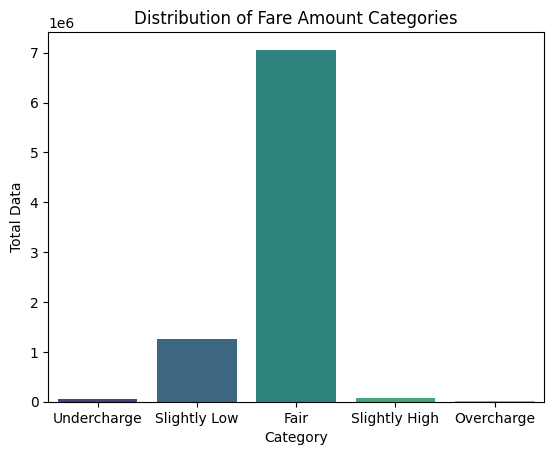

In [9]:
# Bar Plot
sns.countplot(x='fare_category', data=df, palette='viridis', order=sort)
plt.title("Distribution of Fare Amount Categories")
plt.xlabel("Category")
plt.ylabel("Total Data")
plt.show()

In [5]:
percentage_fare_category = df['fare_category'].value_counts(normalize=True) * 100
print(percentage_fare_category.apply(lambda x: f"{x:.2f}%"))

fare_category
Fair             83.55%
Slightly Low     14.78%
Slightly High     0.87%
Undercharge       0.61%
Overcharge        0.19%
Name: proportion, dtype: object


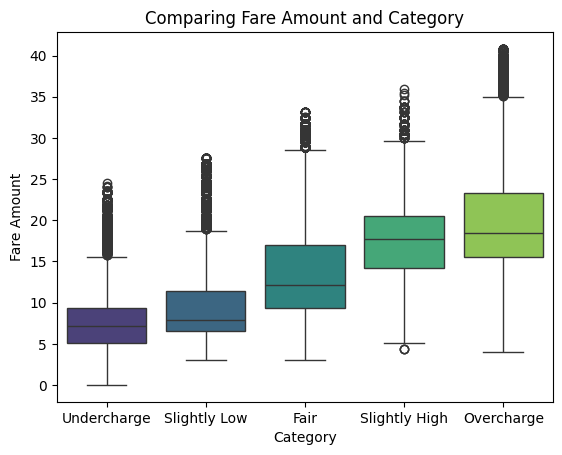

In [13]:
# Box Plot
sns.boxplot(x='fare_category', y='fare_amount', data=df, palette='viridis', order=sort)
plt.title("Comparing Fare Amount and Category")
plt.xlabel("Category")
plt.ylabel("Fare Amount")
plt.show()

## 2. Overcharge

In [4]:
with open('datasets/df_eda.pickle', 'rb') as f:
    df = pickle.load(f)
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration,expect,fare_category
0,1,3.70,Card,24.0,27.950000,26.225000,Fair
1,1,2.77,Card,18.4,19.200000,19.525000,Fair
2,1,3.30,Card,22.6,27.383333,24.941667,Fair
3,1,0.30,Cash,5.1,2.550000,5.025000,Fair
4,1,0.83,Card,7.2,5.250000,7.700000,Fair


### 1. Calculate the Relative Proportion

In [5]:
# Calculate the percentile or fare_amount distribution for each category
overcharge_fare = df[df['fare_category'] == 'Overcharge']['fare_amount']
fair_fare = df[df['fare_category'] == 'Fair']['fare_amount']

print("Fare_amount percentile for Overcharge:")
print(overcharge_fare.quantile([0.25, 0.5, 0.75]))

print("\nFare_amount percentile for Fair:")
print(fair_fare.quantile([0.25, 0.5, 0.75]))

Fare_amount percentile for Overcharge:
0.25    15.5
0.50    18.4
0.75    23.3
Name: fare_amount, dtype: float64

Fare_amount percentile for Fair:
0.25     9.3
0.50    12.1
0.75    17.0
Name: fare_amount, dtype: float64


### 2. Compare Relative Distributions

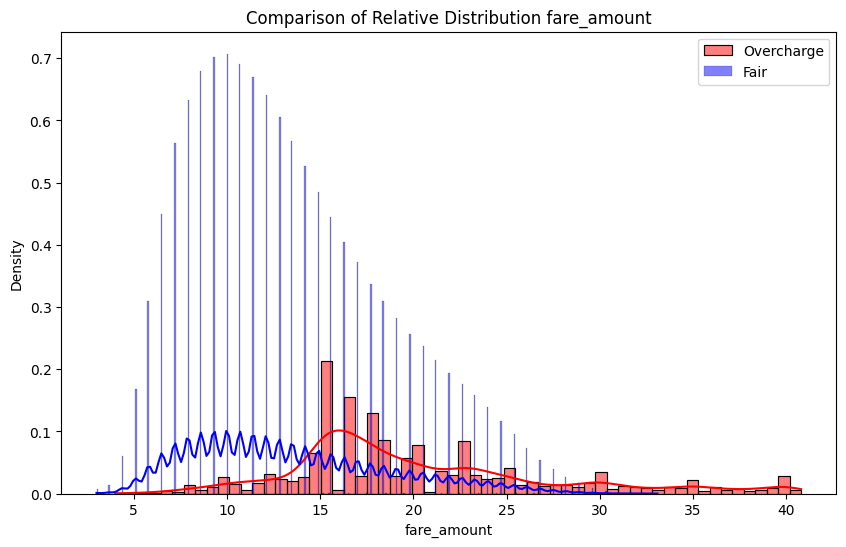

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(overcharge_fare, color='red', label='Overcharge', kde=True, stat='density')
sns.histplot(fair_fare, color='blue', label='Fair', kde=True, stat='density')
plt.title('Comparison of Relative Distribution fare_amount')
plt.legend()
plt.show()

### 3. Relative Difference Analysis

In [7]:
overcharge_mean = overcharge_fare.mean()
fair_mean = fair_fare.mean()

print(f"Average ratio fare_amount (Overcharge/Fair): {overcharge_mean / fair_mean:.2f}")

Average ratio fare_amount (Overcharge/Fair): 1.52


### 4. Relative Difference Analysis between 'fare_amount' and 'expect'

In [8]:
df['difference'] = df['fare_amount'] - df['expect']

overcharge_diff = df[df['fare_category'] == 'Overcharge']['difference'].mean()
fair_diff = df[df['fare_category'] == 'Fair']['difference'].mean()

print(f"The ratio of the difference between fare_amount and expect (Overcharge/Fair): {overcharge_diff / fair_diff:.2f}")

The ratio of the difference between fare_amount and expect (Overcharge/Fair): -21.98


### 5. Visualization of Relative Proportions

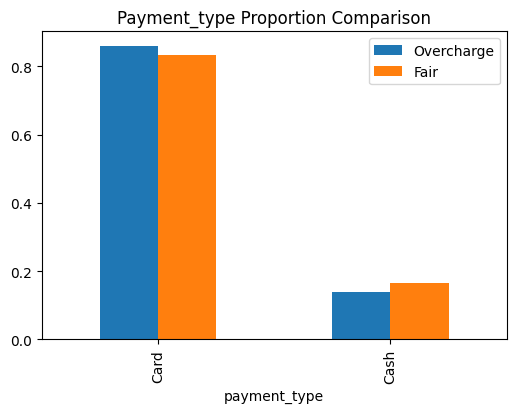

In [13]:
payment_overcharge = df[df['fare_category'] == 'Overcharge']['payment_type'].value_counts(normalize=True)
payment_fair = df[df['fare_category'] == 'Fair']['payment_type'].value_counts(normalize=True)

payment_df = pd.DataFrame({'Overcharge': payment_overcharge, 'Fair': payment_fair})
payment_df.plot(kind='bar', figsize=(6, 4))
plt.title('Payment_type Proportion Comparison')
plt.show()

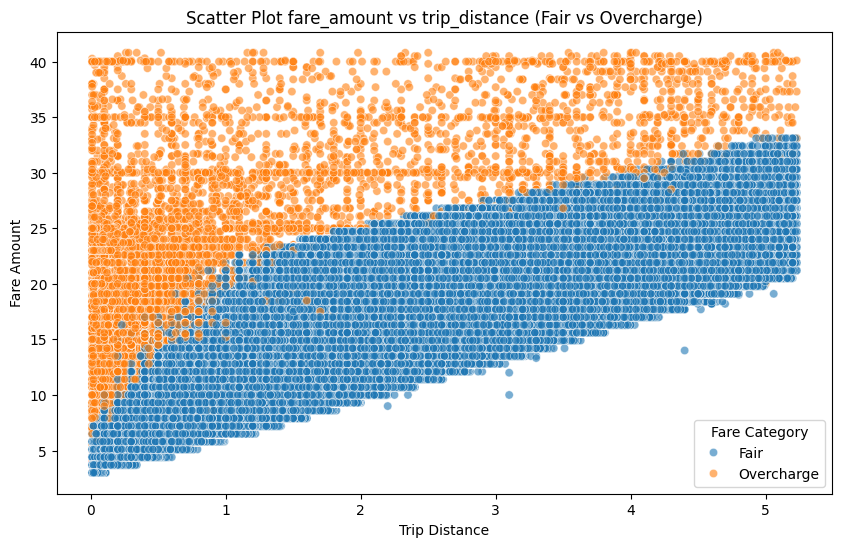

In [11]:
# Filtering Data
filtered_data = df[df['fare_category'].isin(['Fair','Overcharge'])]

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='fare_category', data=filtered_data, alpha=0.6)
plt.title('Scatter Plot fare_amount vs trip_distance (Fair vs Overcharge)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(title='Fare Category')
plt.show()

# 2. Further Analysis

## 1. Further Analysis: Overcharge

### 1. Identify Outliers

Identify whether <strong>Overcharge</strong> is caused by an outlier (extreme value) in fare_amount

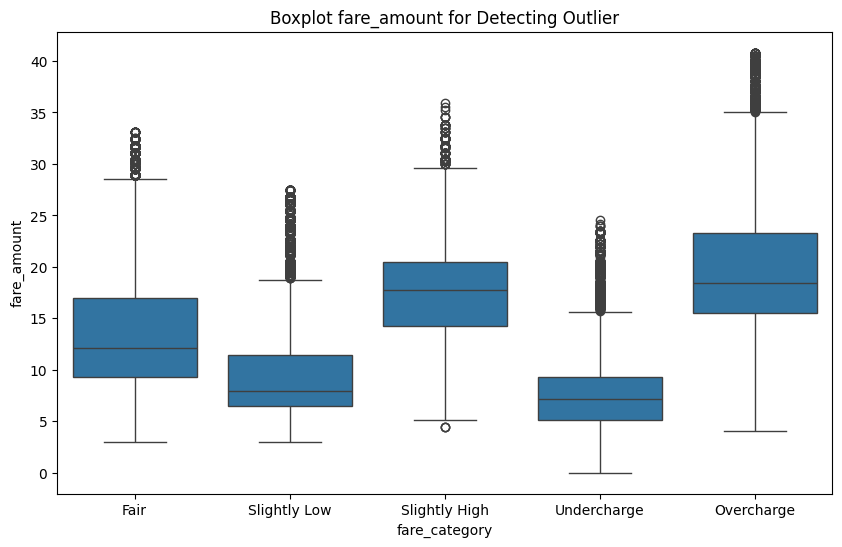

In [6]:
# Filter data for "Overcharge" and "Fair"
overcharge_df = df[df['fare_category'] == 'Overcharge']
fair_df = df[df['fare_category'] == 'Fair']

# Boxplot to detect outliers in fare_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='fare_category', y='fare_amount', data=df)
plt.title('Boxplot fare_amount for Detecting Outlier')
plt.show()

# Calculate IQR for fare_amount on "Overcharge"
Q1 = overcharge_df['fare_amount'].quantile(0.25)
Q3 = overcharge_df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = overcharge_df[(overcharge_df['fare_amount'] < (Q1 - 1.5 * IQR)) | (overcharge_df['fare_amount'] > (Q3 + 1.5 * IQR))]

In [7]:
print("Outlier at fare_amount for Overcharge:")
print(outliers[['fare_amount', 'trip_distance', 'duration', 'passenger_count', 'expect']])

Outlier at fare_amount for Overcharge:
         fare_amount  trip_distance   duration  passenger_count     expect
6011            36.6           4.91  19.766667                1  25.158333
14577           40.0           3.38  20.483333                1  21.691667
15629           38.5           2.70  28.383333                1  23.941667
18909           39.8           4.56  12.533333                2  20.666667
34065           37.5           3.30  18.150000                1  20.325000
...              ...            ...        ...              ...        ...
8418923         40.0           3.00   0.266667                2  10.633333
8428391         40.1           0.24  26.866667                1  17.033333
8429845         39.4           1.28  28.166667                1  20.283333
8439039         38.0           1.41  22.083333                1  17.566667
8449541         35.9           0.91  26.016667                1  18.283333

[848 rows x 5 columns]


### 2. Relationship between trip_distance and fare_amount

Understand whether the fare_amount in "Overcharge" is proportional to the trip_distance.

Rasio fare_amount per unit trip_distance (Overcharge): 140.15
Rasio fare_amount per unit trip_distance (Fair): 8.50


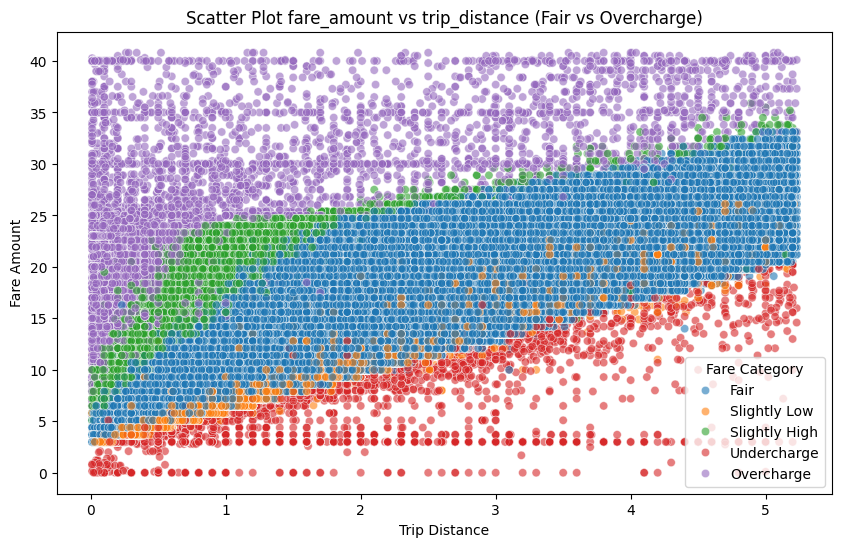

In [9]:
# Calculate the ratio of fare_amount per trip_distance unit
df['fare_per_distance'] = df['fare_amount'] / df['trip_distance']

# Filter data for "Overcharge" and "Fair"
overcharge_df = df[df['fare_category'] == 'Overcharge']
fair_df = df[df['fare_category'] == 'Fair']

# Compare the ratio between "Overcharge" and "Fair"
overcharge_ratio = overcharge_df['fare_per_distance'].mean()
fair_ratio = fair_df['fare_per_distance'].mean()

print(f"Rasio fare_amount per unit trip_distance (Overcharge): {overcharge_ratio:.2f}")
print(f"Rasio fare_amount per unit trip_distance (Fair): {fair_ratio:.2f}")

# Scatter plot for fare_amount and trip_distance relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='fare_category', data=df, alpha=0.6)
plt.title('Scatter Plot fare_amount vs trip_distance (Fair vs Overcharge)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(title='Fare Category')
plt.show()

### 3. Duration

Check whether the duration of the trip affects the occurrence of "Overcharge".

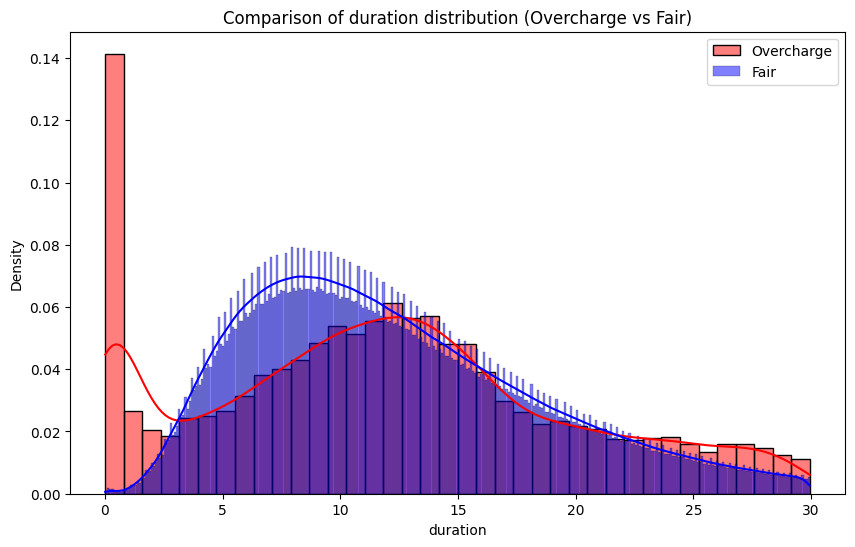

Ratio fare_amount per unit duration (Overcharge): 20.67
Ratio fare_amount per unit duration (Fair): 1.19


In [11]:
# Compare the duration distribution between "Overcharge" and "Fair"
plt.figure(figsize=(10, 6))
sns.histplot(overcharge_df['duration'], color='red', label='Overcharge', kde=True, stat='density')
sns.histplot(fair_df['duration'], color='blue', label='Fair', kde=True, stat='density')
plt.title('Comparison of duration distribution (Overcharge vs Fair)')
plt.legend()
plt.show()

# Calculate the ratio of fare_amount per unit duration
df['fare_per_duration'] = df['fare_amount'] / df['duration']

# Filter data for "Overcharge" and "Fair"
overcharge_df = df[df['fare_category'] == 'Overcharge']
fair_df = df[df['fare_category'] == 'Fair']

# Compare the ratio between "Overcharge" and "Fair"
overcharge_duration_ratio = overcharge_df['fare_per_duration'].mean()
fair_duration_ratio = fair_df['fare_per_duration'].mean()

print(f"Ratio fare_amount per unit duration (Overcharge): {overcharge_duration_ratio:.2f}")
print(f"Ratio fare_amount per unit duration (Fair): {fair_duration_ratio:.2f}")

### 4. passenger_count

Checking whether the number of passengers (passenger_count) affects the occurrence of "Overcharge".

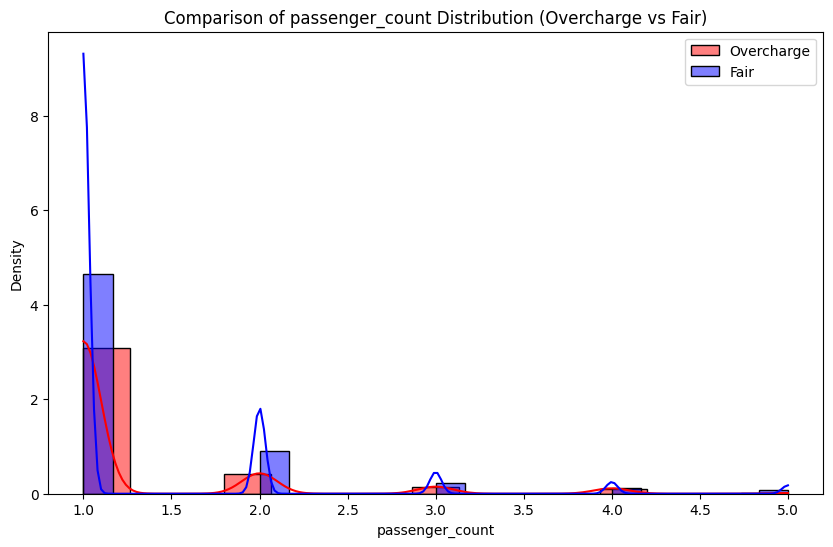

Average fare_amount per passenger (Overcharge): 17.85
Average fare_amount per passenger (Fair): 11.57


In [12]:
# Compare passenger_count distribution between "Overcharge" and "Fair"
plt.figure(figsize=(10, 6))
sns.histplot(overcharge_df['passenger_count'], color='red', label='Overcharge', kde=True, stat='density')
sns.histplot(fair_df['passenger_count'], color='blue', label='Fair', kde=True, stat='density')
plt.title('Comparison of passenger_count Distribution (Overcharge vs Fair)')
plt.legend()
plt.show()

# Calculate the average fare_amount per passenger
df['fare_per_passenger'] = df['fare_amount'] / df['passenger_count']

# Filter data for "Overcharge" and "Fair"
overcharge_df = df[df['fare_category'] == 'Overcharge']
fair_df = df[df['fare_category'] == 'Fair']

# Compare the average between "Overcharge" and "Fair"
overcharge_passenger_ratio = overcharge_df['fare_per_passenger'].mean()
fair_passenger_ratio = fair_df['fare_per_passenger'].mean()

print(f"Average fare_amount per passenger (Overcharge): {overcharge_passenger_ratio:.2f}")
print(f"Average fare_amount per passenger (Fair): {fair_passenger_ratio:.2f}")

### 5. Expect

Understand why the expect on "Overcharge" is much lower than fare_amount.

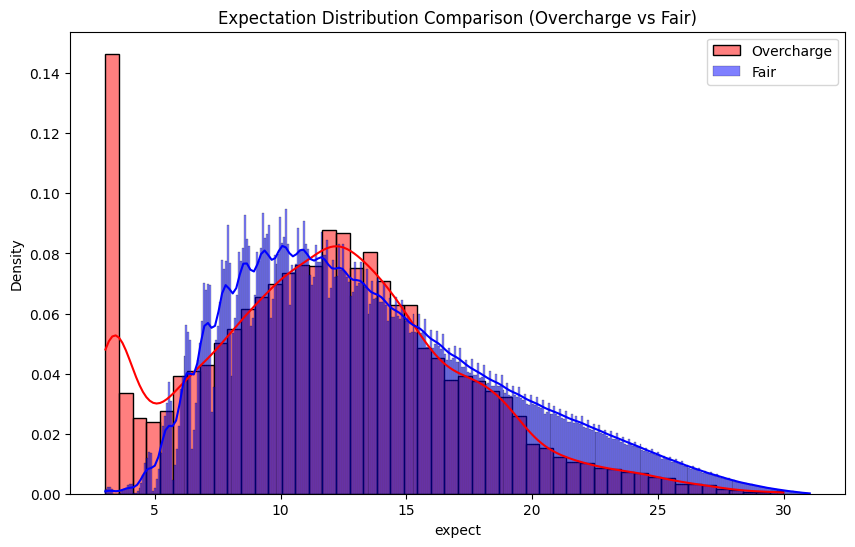

Average difference between fare_amount and expect (Overcharge): 8.39
Average difference between fare_amount and expect (Fair): -0.38


In [13]:
# Compare the expect distribution between "Overcharge" and "Fair"
plt.figure(figsize=(10, 6))
sns.histplot(overcharge_df['expect'], color='red', label='Overcharge', kde=True, stat='density')
sns.histplot(fair_df['expect'], color='blue', label='Fair', kde=True, stat='density')
plt.title('Expectation Distribution Comparison (Overcharge vs Fair)')
plt.legend()
plt.show()

# Calculate the difference between fare_amount and expect
df['difference'] = df['fare_amount'] - df['expect']

# Filter data for "Overcharge" and "Fair"
overcharge_df = df[df['fare_category'] == 'Overcharge']
fair_df = df[df['fare_category'] == 'Fair']

# Compare the difference between "Overcharge" and "Fair"
overcharge_diff = overcharge_df['difference'].mean()
fair_diff = fair_df['difference'].mean()

print(f"Average difference between fare_amount and expect (Overcharge): {overcharge_diff:.2f}")
print(f"Average difference between fare_amount and expect (Fair): {fair_diff:.2f}")

# 3. Statistical Test

In [5]:
from scipy.stats import kstest
from scipy.stats import levene

## 1. Overcharge

In [7]:
# Filter data for "Overcharge" and "Fair"
overcharge_df = df[df['fare_category'] == 'Overcharge']
fair_df = df[df['fare_category'] == 'Fair']

# Normality test for fare_amount on Overcharge
stat, p_value = kstest(overcharge_df['fare_amount'], 'norm')
print(f"Kolmogorov-Smirnov Test for Overcharge: stat = {stat}, p-value = {p_value}")

# Normality test for fare_amount on Fair
stat, p_value = kstest(fair_df['fare_amount'], 'norm')
print(f"Kolmogorov-Smirnov Test for Fair: stat = {stat}, p-value = {p_value}")

Kolmogorov-Smirnov Test for Overcharge: stat = 0.9999683287581669, p-value = 0.0
Kolmogorov-Smirnov Test for Fair: stat = 0.9993128163084478, p-value = 0.0


In [8]:
# Test for homogeneity of variance for fare_amount
stat, p_value = levene(overcharge_df['fare_amount'], fair_df['fare_amount'])
print(f"Levene's Test: stat = {stat}, p-value = {p_value}")

Levene's Test: stat = 1497.7380534976655, p-value = 0.0
